# Support Vector Machines

The following text contains several gaps that should be filled by you.

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np
import seaborn; 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from scipy import stats
import pylab as pl
import random
import pandas as pd
from IPython.html.widgets import interact
seaborn.set()

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs establish a hyperplane that separates the dataset by maximizing the margin. Let's consider a simple example. 

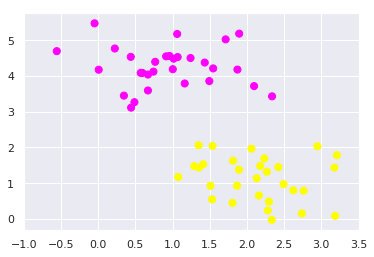

In [37]:
X, y = make_blobs(n_samples=60, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.xlim(-1, 3.5);

Now fit the model by using the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class from scikit-learn. Use a `linear` kernel.

In [38]:
# START YOUR CODE
clf = sklearn.svm.SVC(kernel='linear')
clf.fit(X, y)
# END YOUR CODE

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Plot the boundary:

In [40]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In the following plot the dashed lines touch a couple of the points known as *support vectors*, which are stored in the ``support_vectors_`` attribute of the classifier:

[ 1.19259775 -0.66829007]


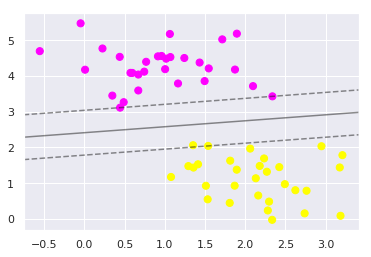

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
print(clf.decision_function([[2,2],[1,3]]))
plot_svc_decision_function(clf)

Now we want to indicate the support vectors by sourrounding circles.

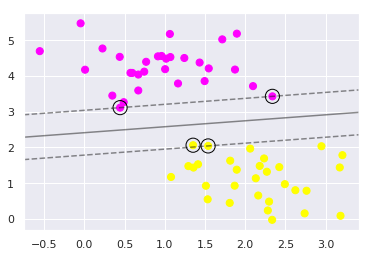

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none',edgecolors="black");
plot_svc_decision_function(clf)

The dataset above was non-overlapping, which means we could come up with a  hyperplane that separated the dataset perfectly. Let us now consider a dataset where no perfect separation is possible. In this case the SVM tries to minimize the datapoints lying on the wrong side of the hyperplane. These datapoints are considered support vectors as well.

At first, we generate the datapoints of the first class by sampling from a normal distribution with standard deviation 1.3 and mean (2,4)

In [43]:
num_entries=100
X=np.zeros((2*num_entries,2))
for i in range(0,num_entries):
    X[i,0]=np.random.normal()*1.3+2
    X[i,1]=np.random.normal()*1.3+4
y=num_entries*[0]

Now we sample the data points from the second class with standard deviation 1.0 and mean (1,0). <font color="red">Fill in the gaps</font>

In [44]:
# START YOUR CODE
for i in range(num_entries,2*num_entries):
    X[i,0]=np.random.normal()+1
    X[i,1]=np.random.normal()
y2=num_entries*[1]
# END YOUR CODE

In [45]:
for i in range(num_entries,2*num_entries):
    X[i,0]=np.random.normal()+1
    X[i,1]=np.random.normal()
y2=num_entries*[1]

Let us combine the class vectors y and y2

In [46]:
y.extend(y2)

print ("len X: ",len(X))
print ("len y: ",len(y))

len X:  200
len y:  200


Let us visualize the generated data samples. 

(-1, 3.5)

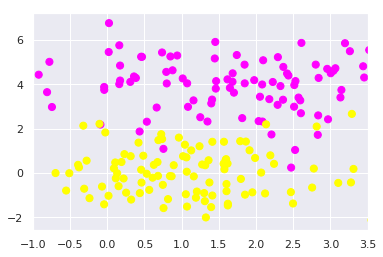

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.xlim(-1, 3.5)

Now we train a linear SVM to find the best separating hyperplane. Hint: use class SVC of sklearn. <font color="red">Fill in the gaps</font>

In [48]:
# START YOUR CODE
clf = sklearn.svm.SVC(kernel='linear')
clf.fit(X, y)
# END YOUR CODE

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Let us again visualize the hyperplane and the support vectors.

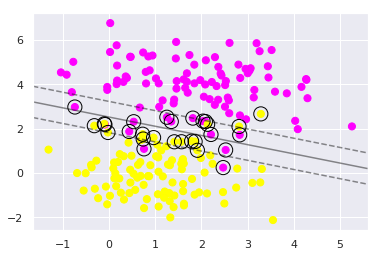

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none',edgecolors="black");
plot_svc_decision_function(clf)

## Support Vector Machine with Kernels Classifier

Kernels are useful when the decision boundary is not linear.  A Kernel is some functional transformation of the input data.  SVMs have clever tricks to ensure kernel calculations are efficient.  In the example below, a linear boundary is not useful in separating the groups of points. <font color="red">Fill in the gaps</font>

In [51]:
X, y = make_circles(100, factor=.1, noise=.1)

In [52]:
# START YOUR CODE
clf = sklearn.svm.SVC(kernel='linear')
clf.fit(X, y)
# END YOUR CODE

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
clf = SVC(kernel='linear').fit(X, y)

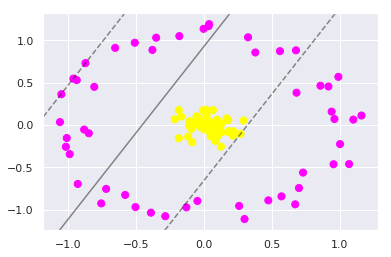

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

A simple model that could be useful is a **radial basis function**:

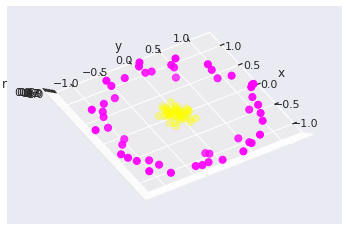

In [55]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))


def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

In three dimensions, there is a clear separation between the data.  Run the SVM with the `rbf` kernel. <font color="red">Fill in the gaps</font>

In [56]:
# START YOUR CODE
clf = sklearn.svm.SVC(kernel='rbf')
clf.fit(X, y)
# END YOUR CODE


/home/alex/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

/home/alex/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

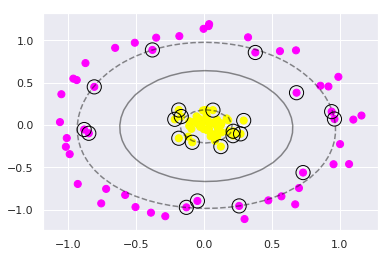

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none',edgecolors="black");

Now we want to apply the SVM on our skin disease data. Load this dataset using pandas.

In [59]:
df=pd.read_csv("skin_disease.csv")
di = {1: 0, 255: 2}
df=df.replace({"class": di})
df[df["class"]==2]
di = {2: 1}
df=df.replace({"class": di})
df[df["class"]==1]
del df["x"]
del df["y"]
del df["expertsEczemaVotePatch"]
del df["expertsEczemaAllVotePatch"]
del df["expertsEczemaVoteCenterPixel"]

In order to save time, we only use 100000 entries for training / testing

In [60]:
df=df.sample(frac=1) # shuffling the data
df=df.iloc[0:100000]

Let us split this dataset into training and test set

In [61]:
train, test = train_test_split(df, test_size=0.5)
X_train = train.drop('class', axis=1)
X_test = test.drop('class', axis=1)
y_train = train["class"]
y_test = test["class"]

Now train an SVM classifier on this dataset, which can take some minutes. Use the `rbf` kernel and a `gamma` value of 0.1. <font color="red">Fill in the gaps</font>

In [62]:
# START YOUR CODE
clf = sklearn.svm.SVC(kernel='rbf', gamma=0.1)
fit = clf.fit(X_train, y_train)
print("Fit: ")
print(fit)
#END YOUR CODE

Fit: 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [63]:
clf = SVC(kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Next, determine f-score and accuracy on the testset. <font color="red">Fill in the gaps</font>

In [64]:
# START YOUR CODE
prediction = clf.predict(X_test)
f1 = f1_score(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)
print ("f1 SVM:", f1)
print ("accuracy SVM:", accuracy)
# END YOUR CODE


f1 SVM: 0.9627525942108137
accuracy SVM: 0.99318


In [65]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print ("f1 SVM:", f1)
print ("accuracy SVM:", accuracy)

f1 SVM: 0.9627525942108137
accuracy SVM: 0.99318


and compare the result with a  logistic regression model. Use the class [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from scikit-learn. <font color="red">Fill in the gaps</font>

In [66]:
# START YOUR CODE
log_reg = sklearn.linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
f1 = f1_score(y_test, log_reg_predict)
accuracy = accuracy_score(y_test, log_reg_predict)

print ("accuracy logistic regression: ", accuracy)
print ("f1 logistic regression: ", f1)
# END YOUR CODE

/home/alex/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy logistic regression:  0.92794
f1 logistic regression:  0.516051040967092


In [67]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print ("accuracy logistic regression: ", accuracy)
print ("f score logistic regression: ", f1)

/home/alex/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy logistic regression:  0.92794
f score logistic regression:  0.516051040967092


Final remarks:
* When using an SVM you need to choose the right values for parameters such as `C` and `gamma`.  Model validation can help to determine these optimal values by trial and error.
* SVMs run in $O(n^3)$ performance.  [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) is scalable, [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) does not seem to be scalable.  For large data sets try transforming the data to a smaller space and use LinearSVC with rbf.